## Predict Restaurant Menu Items Profitability

In [3]:
# improt libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as st

plt.style.use('ggplot')

plt.rcParams['figure.dpi'] = 150

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [4]:
# load data

df = pd.read_csv('restaurant_menu_optimization_data.csv')

In [5]:
df.head()

,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability
0,R003,Beverages,Soda,['confidential'],2.55,Low
1,R001,Appetizers,Spinach Artichoke Dip,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.12,Medium
2,R003,Desserts,New York Cheesecake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.66,High
3,R003,Main Course,Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",29.55,High
4,R002,Main Course,Grilled Steak,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",17.73,Medium


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RestaurantID   1000 non-null   object 
 1   MenuCategory   1000 non-null   object 
 2   MenuItem       1000 non-null   object 
 3   Ingredients    1000 non-null   object 
 4   Price          1000 non-null   float64
 5   Profitability  1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB


### Data check

In [7]:
# Numerical Data

df.describe()

,Price
count,1000.00000
mean,12.81801
std,7.41713
min,2.01000
25%,4.86750
50%,12.53500
75%,17.69000
max,29.84000


In [8]:
# Categorical Data

df.describe(include = 'object')

,RestaurantID,MenuCategory,MenuItem,Ingredients,Profitability
count,1000,1000,1000,1000,1000
unique,3,4,16,4,3
top,R001,Beverages,Iced Tea,['confidential'],Medium
freq,354,264,72,264,495


### EDA

<Axes: >

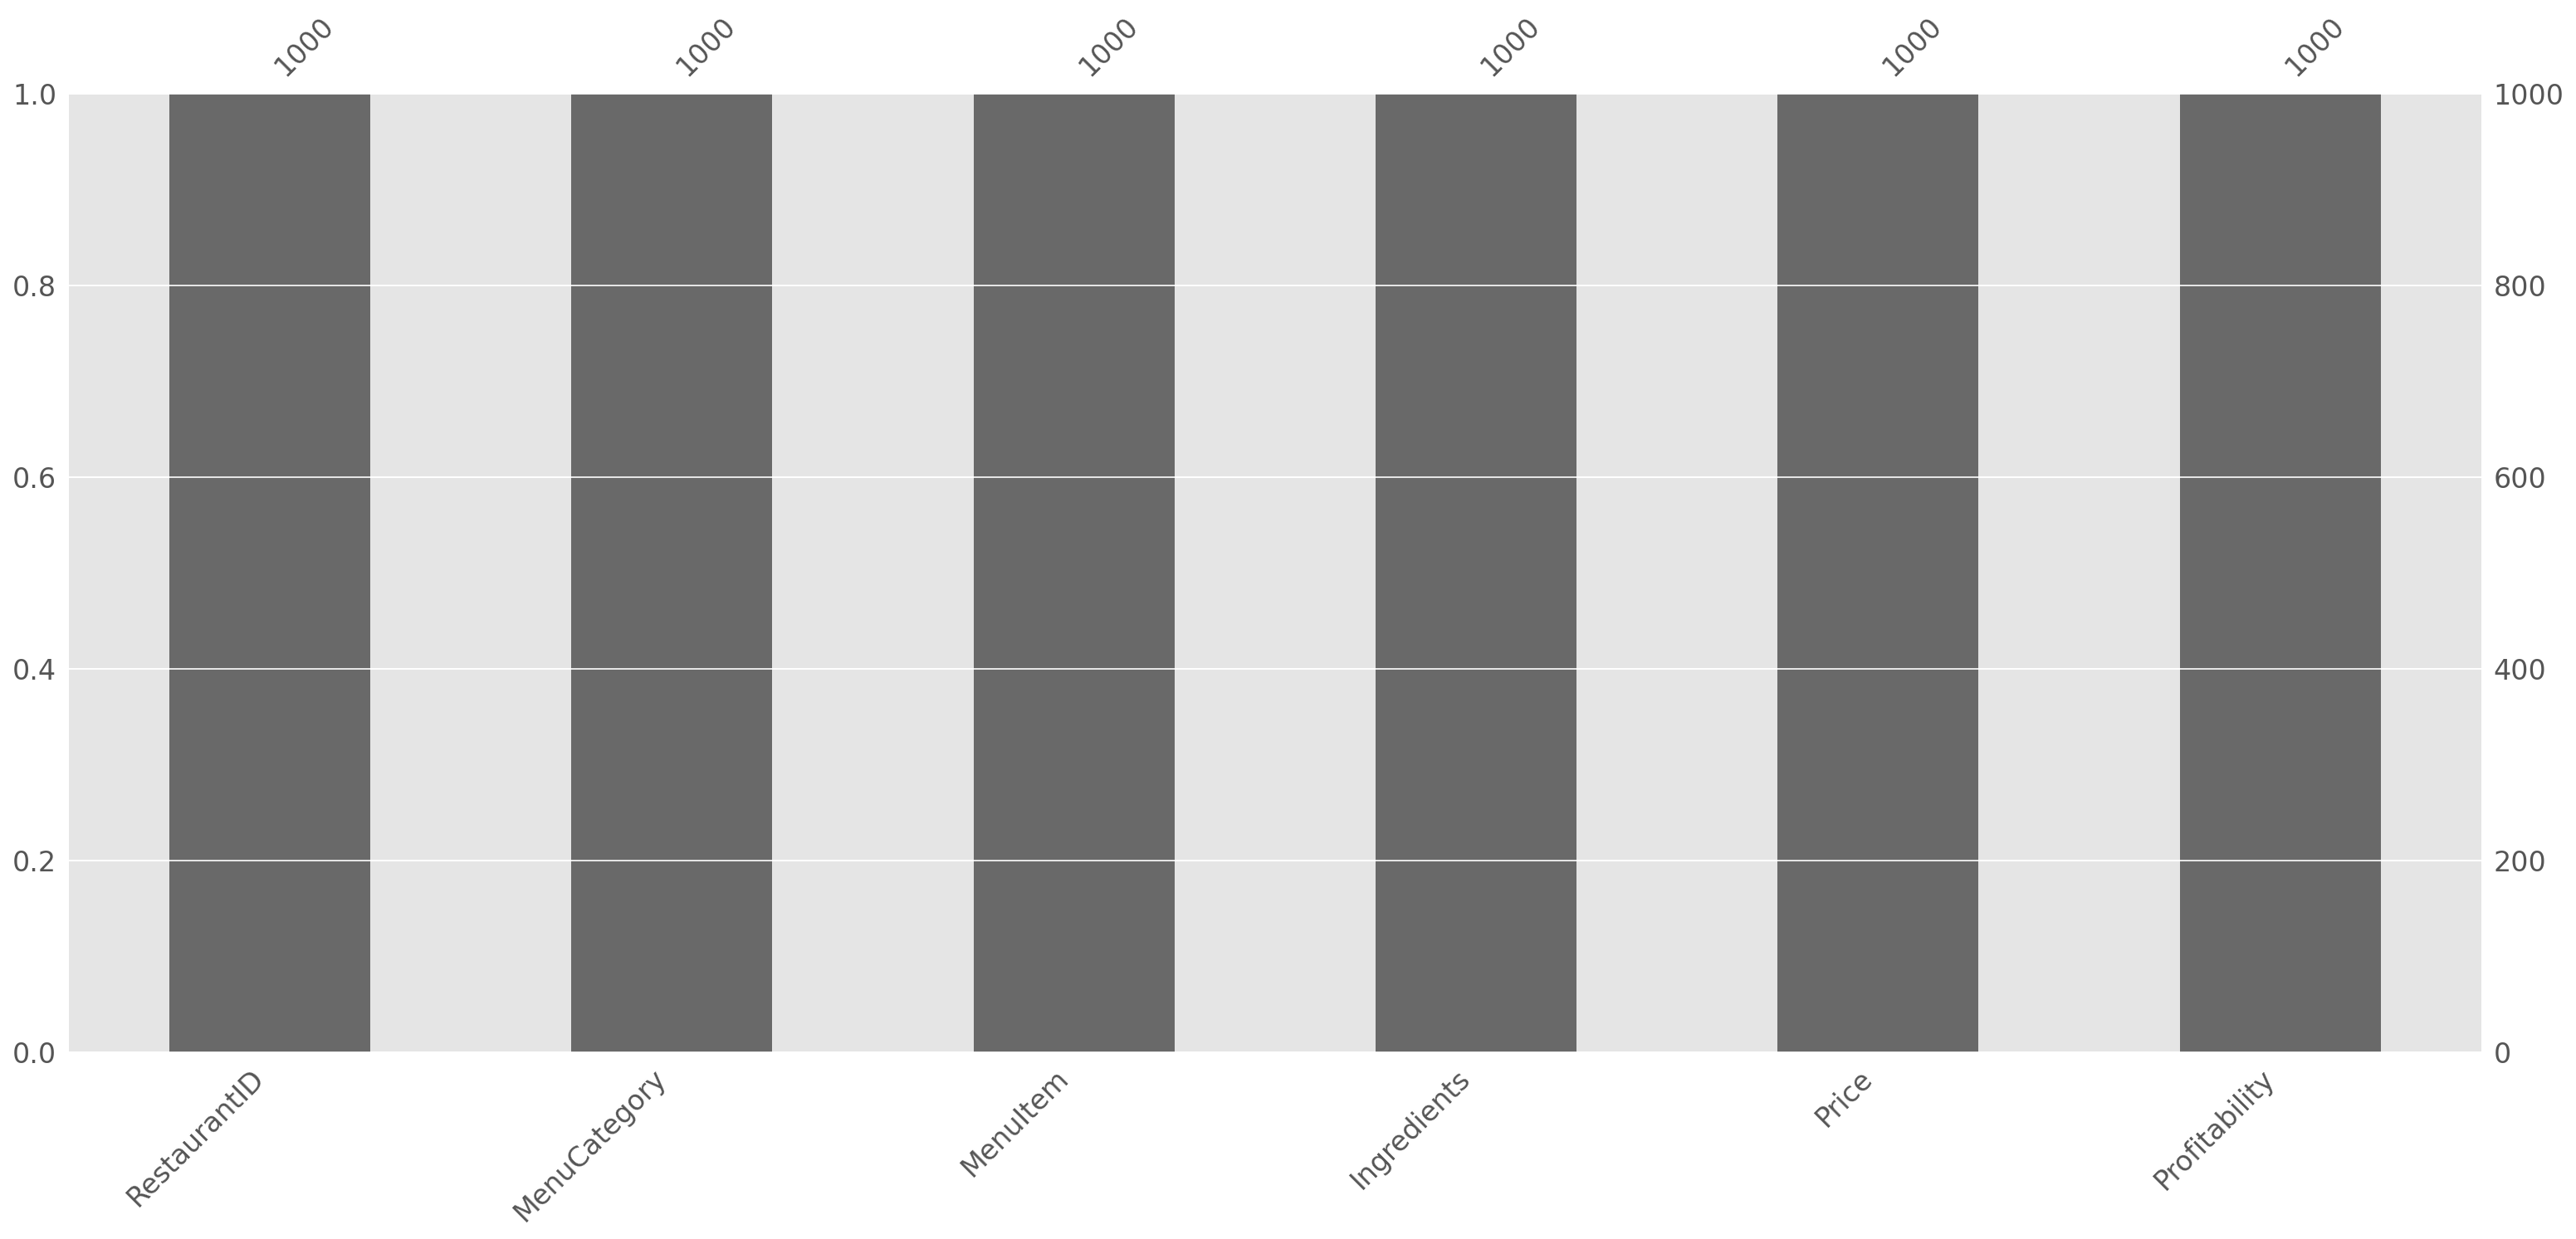

In [9]:
# check the missing value using missingno

msno.bar(df)

Price Data skewness : 0.3589500550270436


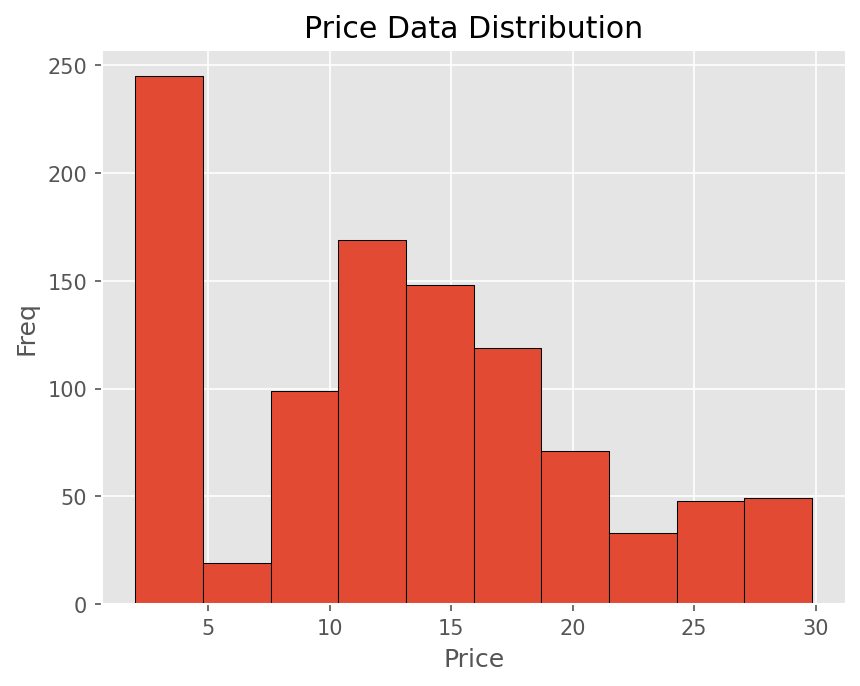

In [10]:
# Visualize the distribution of numerical data

print(f"Price Data skewness : {df['Price'].skew()}")

plt.hist(df['Price'] , edgecolor = 'black' , bins = 10)
plt.xlabel('Price')
plt.ylabel('Freq')
plt.title('Price Data Distribution')
plt.show()

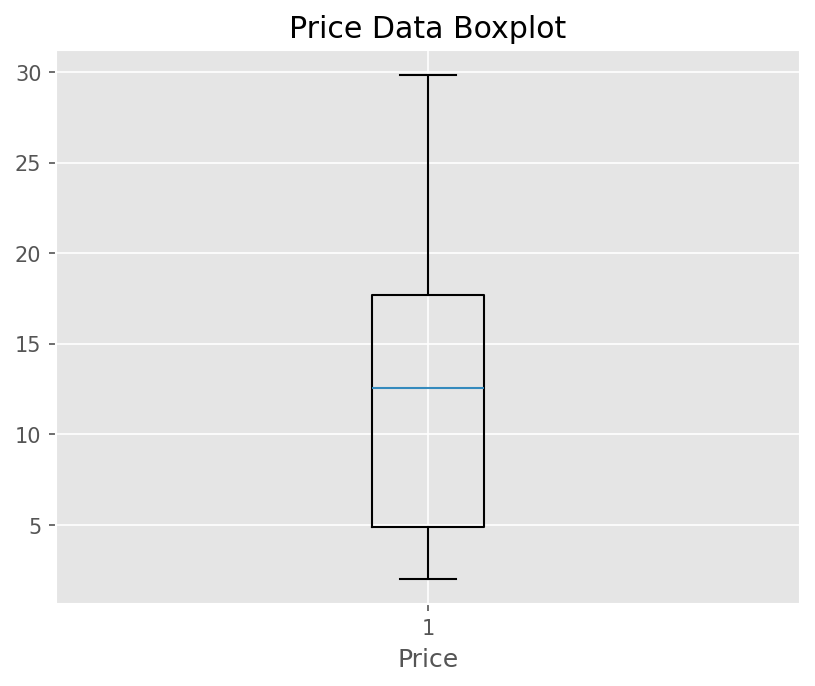

In [11]:
plt.boxplot(df['Price'])
plt.xlabel('Price')
plt.title('Price Data Boxplot')
plt.show()

In [12]:
# Visualize the distribution of numerical data
# separate categorical data from the entire dataset

obj_data = df.select_dtypes('object')

obj_data.head()

,RestaurantID,MenuCategory,MenuItem,Ingredients,Profitability
0,R003,Beverages,Soda,['confidential'],Low
1,R001,Appetizers,Spinach Artichoke Dip,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",Medium
2,R003,Desserts,New York Cheesecake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",High
3,R003,Main Course,Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",High
4,R002,Main Course,Grilled Steak,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",Medium


In [13]:
# check the cardinality

cols = obj_data.columns

for col in cols:
    print(f"{col} Nunique : {obj_data[col].nunique()}")

RestaurantID Nunique : 3
MenuCategory Nunique : 4
MenuItem Nunique : 16
Ingredients Nunique : 4
Profitability Nunique : 3


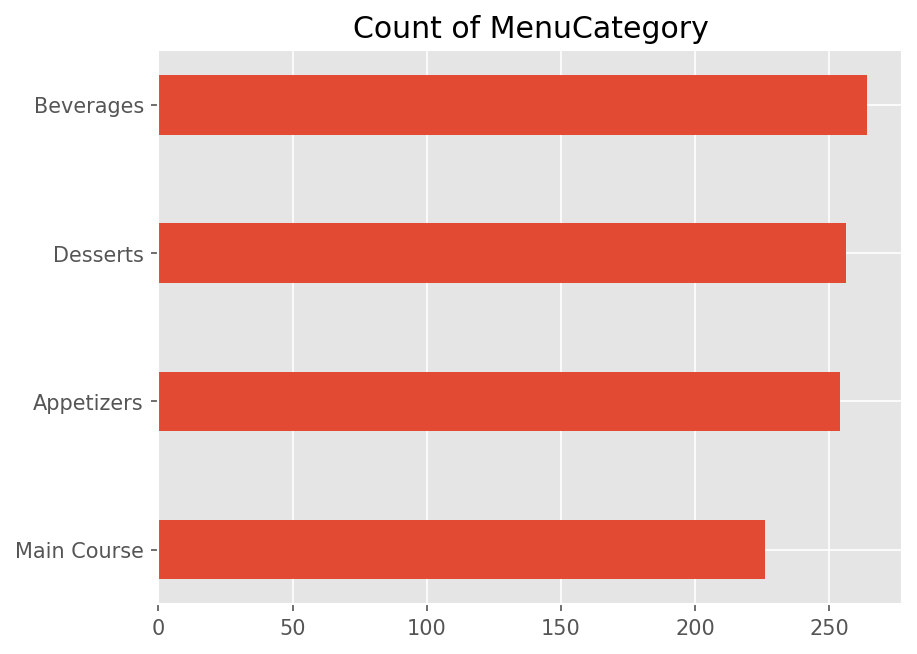

In [14]:
# MenuCategory

data = obj_data['MenuCategory'].value_counts(ascending = True)
plt.barh(data.index , data.values , height = 0.4)
plt.title('Count of MenuCategory')
plt.show()

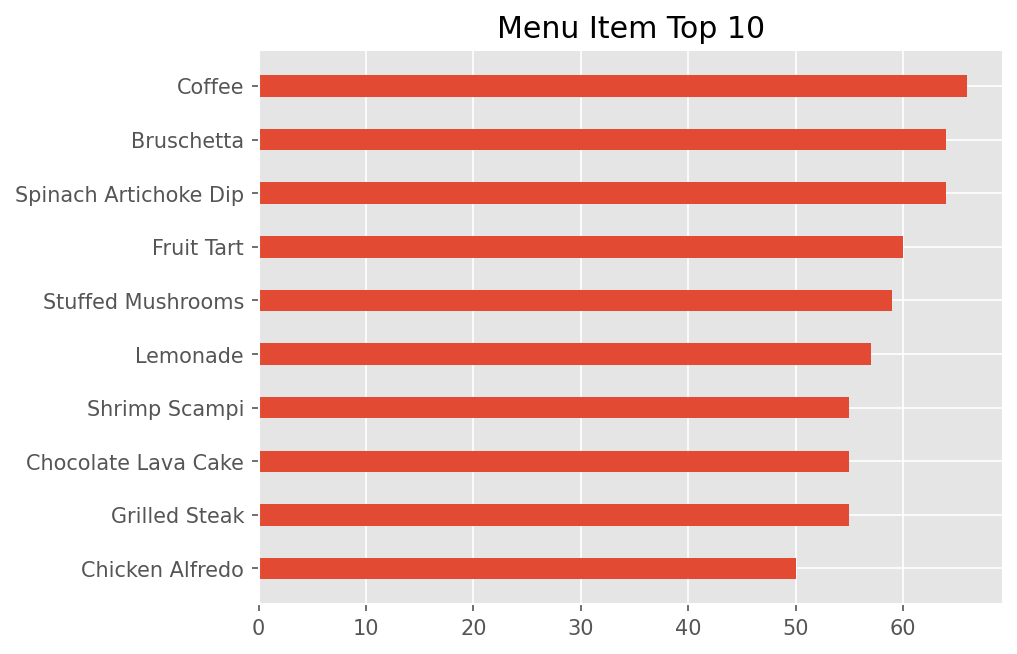

In [15]:
# MenuItem

data = obj_data['MenuItem'].value_counts(ascending = True).head(10)
plt.barh(data.index , data.values , height = 0.4)
plt.title('Menu Item Top 10')
plt.show()

We can see that the menu item are different depending on the specific ingredients

In [16]:
# Ingredients

obj_data.groupby(['Ingredients' , 'MenuItem'])['MenuItem'].count()

Ingredients                                             MenuItem             
['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Parmesan']  Chicken Alfredo          50
                                                        Grilled Steak            55
                                                        Shrimp Scampi            55
                                                        Vegetable Stir-Fry       66
['Chocolate', 'Butter', 'Sugar', 'Eggs']                Chocolate Lava Cake      55
                                                        Fruit Tart               60
                                                        New York Cheesecake      71
                                                        Tiramisu                 70
['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']            Bruschetta               64
                                                        Caprese Salad            67
                                                        Spinach Artichoke Dip    6

If the price difference between the same ingredient groups is not large and the price difference between groups is clear

--> We can group menu items according to ingredients

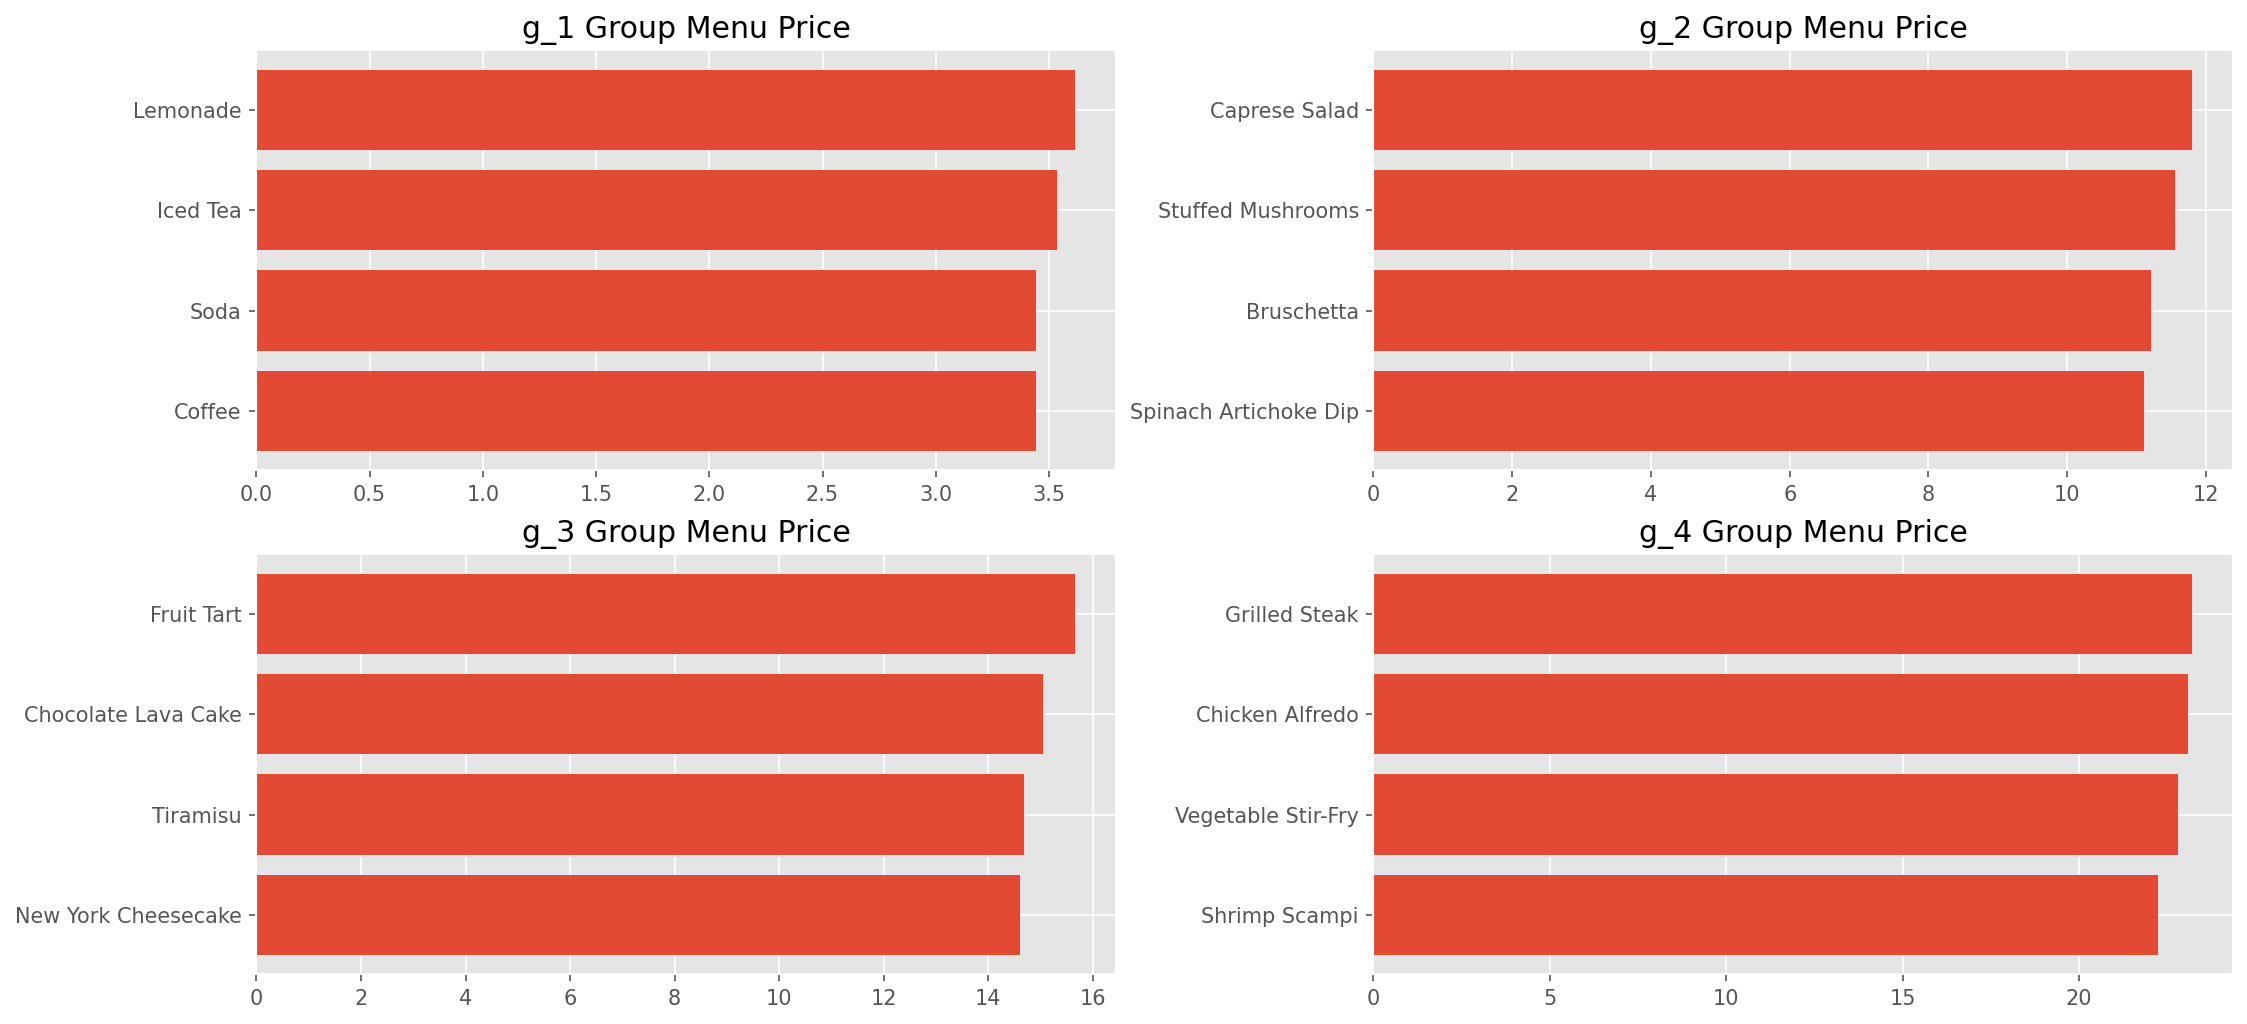

In [17]:
# Price , Profitability

# Price
ingredients = df['Ingredients'].unique()

g1 = df[df['Ingredients'] == ingredients[0]]
g2 = df[df['Ingredients'] == ingredients[1]]
g3 = df[df['Ingredients'] == ingredients[2]]
g4 = df[df['Ingredients'] == ingredients[3]]

# 시각화

group = [g1 , g2 , g3 , g4]

fig , ax = plt.subplots(2 , 2 , figsize = (17 , 8))
plt.subplots_adjust(wspace = 0.3)
for i in range(4):
    row = i // 2
    col = i % 2

    data = group[i].groupby(['MenuItem'])['Price'].mean()\
    .sort_values()
    ax[row][col].barh(data.index , data.values)
    ax[row][col].set_title(f"g_{i + 1} Group Menu Price")

plt.show()

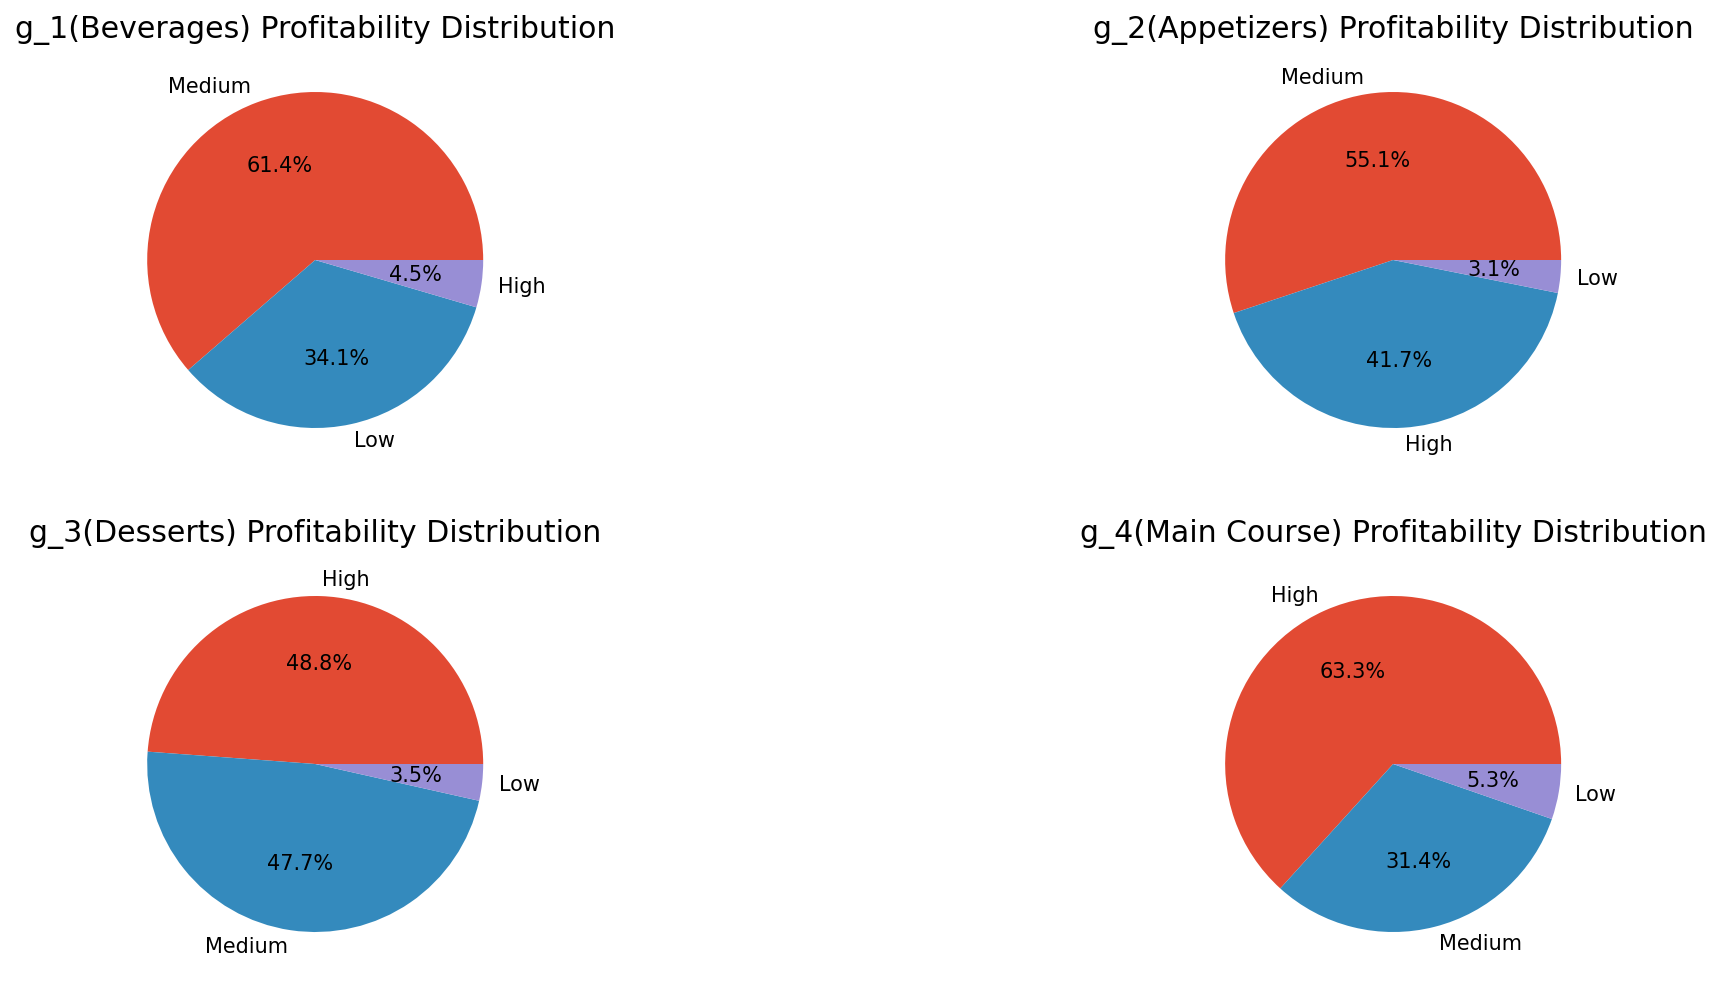

In [18]:
# Profitability

fig , ax = plt.subplots(2 , 2 , figsize = (17 , 8))
for i in range(4):
    row = i // 2
    col = i % 2

    data = group[i]['Profitability'].value_counts()
    ax[row][col].pie(data , labels = data.index , autopct = '%1.1f%%')
    ax[row][col].set_title(f"g_{i + 1}({group[i]['MenuCategory'].unique()[0]}) Profitability Distribution")
    
plt.show()

There is not much difference between the same groups , and the difference between the groups is evident.

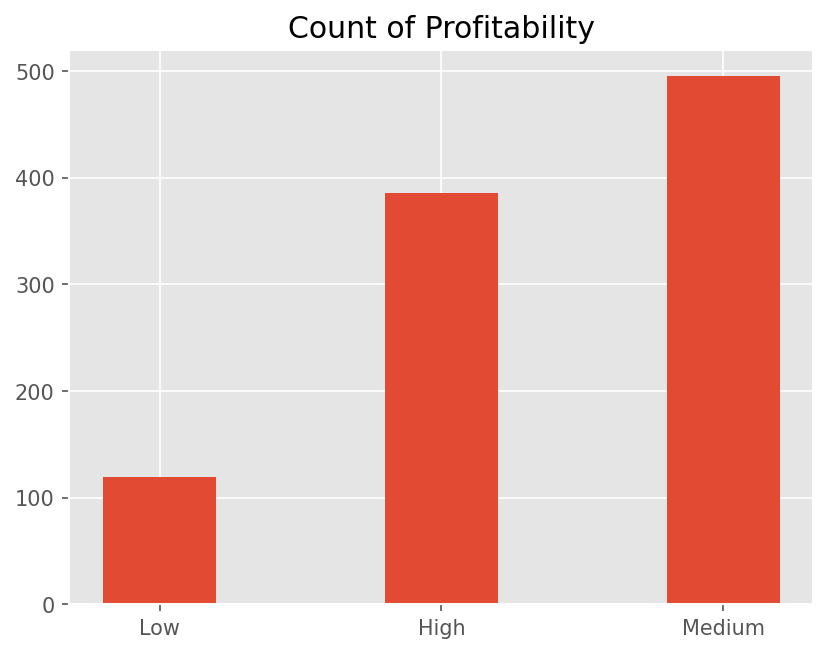

In [19]:
# Profitability

data = obj_data['Profitability'].value_counts(ascending = True)
plt.bar(data.index , data.values , width = 0.4)
plt.title('Count of Profitability')
plt.show()

### Preprocessing

In [20]:
# drop ID
df.drop(['RestaurantID'] , axis = 1 , inplace = True)

In [21]:
# Grouping

for i in range(df.shape[0]):
    if df.loc[i , 'MenuCategory'] == 'Beverages':
        df.loc[i , 'MenuItem'] = 'A'
    elif df.loc[i , 'MenuCategory'] == 'Appetizers':
        df.loc[i , 'MenuItem'] = 'B'
    elif df.loc[i , 'MenuCategory'] == 'Desserts':
        df.loc[i , 'MenuItem'] = 'C'
    else:
        df.loc[i , 'MenuItem'] = 'D'

In [22]:
# Encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['MenuCategory'] = encoder.fit_transform(df['MenuCategory'])
df['MenuItem'] = encoder.fit_transform(df['MenuItem'])
df['Ingredients'] = encoder.fit_transform(df['Ingredients'])

# target value encoding

df['Profitability'] = encoder.fit_transform(df['Profitability'])

In [23]:
df.head()

,MenuCategory,MenuItem,Ingredients,Price,Profitability
0,1,0,3,2.55,1
1,0,1,2,11.12,2
2,2,2,1,18.66,0
3,3,3,0,29.55,0
4,3,3,0,17.73,2


### Modeling

In [24]:
# set the value of y

target = df['Profitability']
df.drop(['Profitability'] , axis = 1 , inplace = True)

In [28]:
%pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 50.4 kB/s eta 0:41:16
   ---------------------------------------- 0.0/124.9 MB 50.4 kB/s eta 0:41:16
   ---------------------------------------- 0.0/124.9 MB 50.4 kB/s eta 0:41:16
   ---------------------------------------- 0.0/124.9 MB 50.4 kB/s eta 0:41:16
   ---------------------------------------- 0

In [27]:
# using xgb model

import xgboost as xgb

from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import f1_score , classification_report

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# split data into train and test data.

trainX , testX , trainY , testY = train_test_split(df , target , test_size = 0.2 , random_state = 42)

In [ ]:
model = xgb.XGBClassifier()

model.fit(trainX , trainY)

In [ ]:
# Normal Model evaluation

print(f"train data r2 : {model.score(trainX , trainY)}")
print(f"test data r2 : {model.score(testX , testY)}")

y_pred = model.predict(testX)

print(classification_report(testY , y_pred))

We can see that the f1 score is low on specific class.

so , it seems that the imbalance in the class needs to be resolved.

In [ ]:
# Oversampling

%pip install imblearn

from imblearn.over_sampling import SMOTE

We can use SMOTE to solve this problem.

In [ ]:
smote = SMOTE()

df_resampled , target_resampled = smote.fit_resample(df , target)

In [ ]:
# check the data size.

print(f"Data size before Oversampling : {df.shape}")
print(f"Data size before Oversampling : {target.shape}")
print(f"Data size after Oversampling : {df_resampled.shape}")
print(f"Data size after Oversampling : {target_resampled.shape}")

Using SMOTE , we can see that the imbalance between classes has been resolved.

In [ ]:
# Profitability

data = target_resampled.value_counts()
plt.bar(data.index , data.values , width = 0.4)
plt.title('Count of Profitability after Oversampling')
plt.show()

In [ ]:
trainX , testX , trainY , testY = train_test_split(df_resampled , target_resampled 
                                                   , test_size = 0.2 , random_state = 42)

In [ ]:
model = xgb.XGBClassifier()

model.fit(trainX , trainY)

In [ ]:
# Model evaluation

print(f"train data r2 : {model.score(trainX , trainY)}")
print(f"test data r2 : {model.score(testX , testY)}")

y_pred = model.predict(testX)

print(classification_report(testY , y_pred))

We can see that it's generalized as a whole.

In [ ]:
xgb.plot_importance(model)

### HyperParameter Tuning

In [ ]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 5)

In [ ]:
model = xgb.XGBClassifier()

params = {
    'n_estimators' : [100 , 200 , 300] ,
    'max_depth' : [3 , 7] ,
    'min_child_weight' : [1 , 3] ,
    'colsample_bytree' : [0.5 , 0.8]
}

gcv = GridSearchCV(model , param_grid = params , cv = kfold , scoring = 'accuracy' ,
verbose = 1)
gcv.fit(trainX , trainY)

best = gcv.best_estimator_

In [ ]:
print(f"best model score : {gcv.best_score_}")
print(f"params : {gcv.best_params_}")

In [ ]:
model = xgb.XGBClassifier(
    n_estimators = 100 ,
    max_depth = 3 ,
    min_child_weight = 1 ,
    colsample_bytree = 0.8
)

model.fit(trainX , trainY)

# Model evaluation

print(f"train data r2 : {model.score(trainX , trainY)}")
print(f"test data r2 : {model.score(testX , testY)}")

y_pred = model.predict(testX)

print(classification_report(testY , y_pred))

Through the hyperparameter tuning using GridSearchCV , we can see that not only Price but also other features are better reflected in the model.

In [ ]:
xgb.plot_importance(model)